In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sn
import matplotlib.pyplot as plt
from graphviz import Digraph
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/Mintra_rating_project/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D:/Mintra_rating_project/archive.zip
D:/Mintra_rating_project/menscategorydata.ipynb
D:/Mintra_rating_project/MyntraMensCategoryData.csv
D:/Mintra_rating_project/MyntraWomensCategoryData.csv
D:/Mintra_rating_project/MyntraWomensCategoryDataNew.csv
D:/Mintra_rating_project/test-output.png
D:/Mintra_rating_project/tree_diagram.png
D:/Mintra_rating_project/womenscategorynew.ipynb
D:/Mintra_rating_project/.ipynb_checkpoints\menscategorydata-checkpoint.ipynb
D:/Mintra_rating_project/.ipynb_checkpoints\tree_diagram-checkpoint
D:/Mintra_rating_project/.ipynb_checkpoints\womenscategorynew-checkpoint.ipynb
D:/Mintra_rating_project/archive\MyntraMensCategoryData.csv
D:/Mintra_rating_project/archive\MyntraWomensCategoryData.csv
D:/Mintra_rating_project/archive\MyntraWomensCategoryDataNew.csv


In [2]:
dataset = pd.read_csv("MyntraWomensCategoryDataNew.csv")
dataset.head(10000)

,BrandName,category,Individual_category,discounted_price,OriginalPrice (in Rs),Discount,SizeOption,ratings,Reviews
0,Roadster,Western,tshirts,389.0,599,35%,"XS, S, M, L, XL",4.2,999.0
1,Mast & Harbour,Western,tops,359.0,599,40%,"XS, S, M, L, XL",4.4,999.0
2,Mayra,Western,tops,586.0,1395,58%,"S, M, L, XL",3.7,998.0
3,Roadster,Western,tshirts,1098.0,1098,NaN,"XS, S, M, L, XL",4.3,997.0
4,Athena,Western,jumpsuit,1250.0,2499,50%,"XS, S, M, L, XL",4.3,996.0
...,...,...,...,...,...,...,...,...,...
458,HERE&NOW,Plus Size,tops,419.0,1399,70%,"XS, S, M, L, XL, XXL",3.9,0.0
459,HERE&NOW,Plus Size,tops,419.0,1399,70%,"XS, S, M, L, XL, XXL",4.1,0.0
460,HERE&NOW,Plus Size,kurtas,419.0,1399,70%,"XS, S, M, L, XL, XXL, 3XL",4.2,0.0
461,HERE&NOW,Plus Size,kurtas,419.0,1399,70%,"XS, S, M, L, XL, XXL, 3XL",4.2,0.0


In [3]:
discount_price_mode = dataset['discounted_price'].mode()

# Display the mode
print(f'Mode of Discount Price: {discount_price_mode}')

discount_price_mode_scalar = discount_price_mode[0]
print(f'Mode of Discount Price (Scalar): {discount_price_mode_scalar}')

ratings_mode = dataset['ratings'].mode()
ratings_mode_scalar = ratings_mode[0]

Mode of Discount Price: 0    419.0
Name: discounted_price, dtype: float64
Mode of Discount Price (Scalar): 419.0


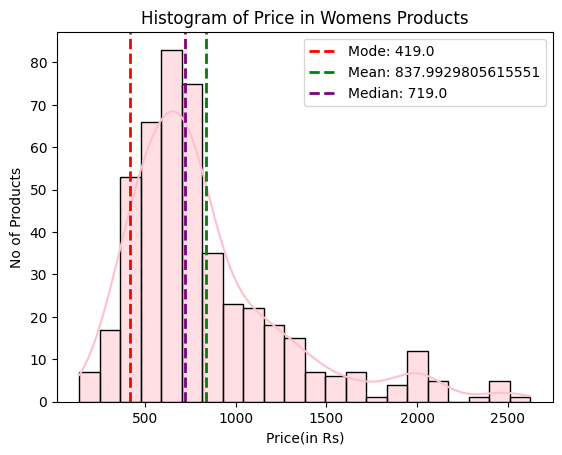

In [4]:
sn.histplot(dataset['discounted_price'], kde=True, color='pink', edgecolor='black')
plt.axvline(discount_price_mode_scalar, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {discount_price_mode_scalar}')
plt.legend()

discount_price_mean = dataset['discounted_price'].mean()
plt.axvline(discount_price_mean, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {discount_price_mean}')
plt.legend()

# Calculate and plot median
discount_price_median = dataset['discounted_price'].median()
plt.axvline(discount_price_median, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {discount_price_median}')
plt.legend()

# Set plot labels and title
plt.title('Histogram of Price in Womens Products')
plt.xlabel('Price(in Rs)')
plt.ylabel('No of Products')

# Show the plot
plt.show()

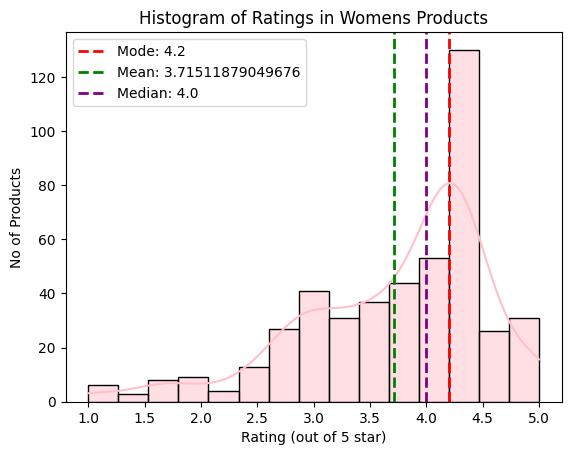

In [5]:
sn.histplot(dataset['ratings'], kde=True, color='pink', edgecolor='black')
plt.axvline(ratings_mode_scalar, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {ratings_mode_scalar}')
plt.legend()

ratings_mean = dataset['ratings'].mean()
plt.axvline(ratings_mean, color='green', linestyle='dashed', linewidth=2, label=f'Mean: {ratings_mean}')
plt.legend()

# Calculate and plot median
ratings_median = dataset['ratings'].median()
plt.axvline(ratings_median, color='purple', linestyle='dashed', linewidth=2, label=f'Median: {ratings_median}')
plt.legend()

# Set plot labels and title
plt.title('Histogram of Ratings in Womens Products')
plt.xlabel('Rating (out of 5 star)')
plt.ylabel('No of Products')

# Show the plot
plt.show()

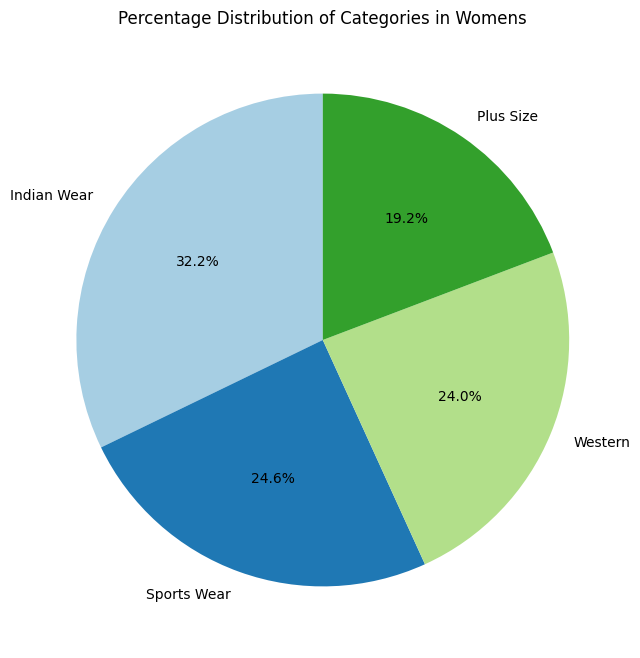

In [6]:
category_counts = dataset['category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Distribution of Categories in Womens')
plt.show()

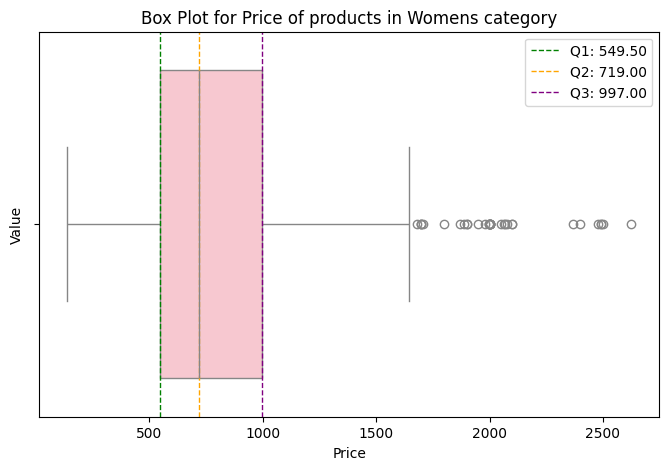

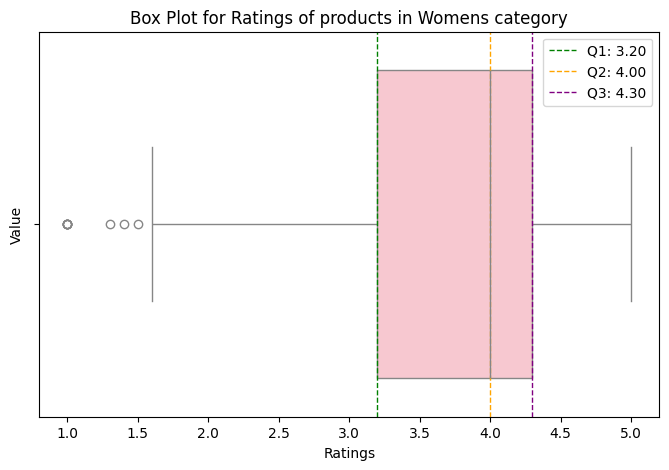

In [7]:
# Box plot for discount_price
plt.figure(figsize=(8, 5))
sn.boxplot(x=dataset['discounted_price'], color='pink')

plt.axvline(dataset['discounted_price'].quantile(0.25), color='green', linestyle='dashed', linewidth=1, label=f'Q1: {dataset["discounted_price"].quantile(0.25):.2f}')
plt.axvline(dataset['discounted_price'].median(), color='orange', linestyle='dashed', linewidth=1, label=f'Q2: {dataset["discounted_price"].median():.2f}')
plt.axvline(dataset['discounted_price'].quantile(0.75), color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {dataset["discounted_price"].quantile(0.75):.2f}')

plt.title('Box Plot for Price of products in Womens category')
plt.xlabel('Price')
plt.ylabel('Value')
plt.legend()
plt.show()

# Univariate analysis for ratings

# Box plot for ratings
plt.figure(figsize=(8, 5))
sn.boxplot(x=dataset['ratings'], color='pink')

plt.axvline(dataset['ratings'].quantile(0.25), color='green', linestyle='dashed', linewidth=1, label=f'Q1: {dataset["ratings"].quantile(0.25):.2f}')
plt.axvline(dataset['ratings'].median(), color='orange', linestyle='dashed', linewidth=1, label=f'Q2: {dataset["ratings"].median():.2f}')
plt.axvline(dataset['ratings'].quantile(0.75), color='purple', linestyle='dashed', linewidth=1, label=f'Q3: {dataset["ratings"].quantile(0.75):.2f}')

plt.title('Box Plot for Ratings of products in Womens category')
plt.xlabel('Ratings')
plt.ylabel('Value')
plt.legend()
plt.show()

Correlation between discount_price and ratings: 0.031675362206402616


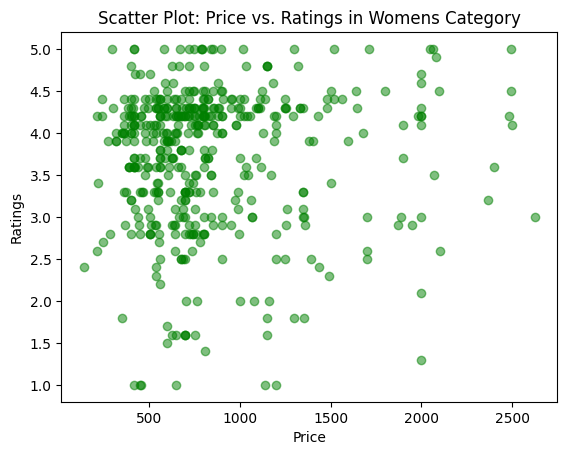

In [8]:
correlation = dataset['discounted_price'].corr(dataset['ratings'])
print(f'Correlation between discount_price and ratings: {correlation}')

# Scatter plot
plt.scatter(dataset['discounted_price'], dataset['ratings'], alpha=0.5, color='green')
plt.title('Scatter Plot: Price vs. Ratings in Womens Category')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.show()

In [9]:
tree_diagram = Digraph(comment='Clothing Products', format='png')

In [10]:
# Set graph attributes for a more aesthetic appearance
tree_diagram.attr(rankdir='TB', size='10,10')

# Add nodes and edges to the tree diagram with styling
tree_diagram.node('Clothing', label='Clothing Products', style='filled', color='red', shape='box')
tree_diagram.node('Men', label='Men', style='filled', color='skyblue', shape='ellipse')
tree_diagram.node('Women', label='Women', style='filled', color='pink', shape='ellipse')

# Sub-categories for Men
tree_diagram.node('Bottom Wear', label='Bottom Wear', style='filled', color='lightgreen', shape='box')
tree_diagram.node('Top Wear', label='Top Wear', style='filled', color='lightgreen', shape='box')
tree_diagram.node('Plus Size', label='Plus Size', style='filled', color='lightgreen', shape='box')
tree_diagram.node('Indian', label='Indian', style='filled', color='lightgreen', shape='box')
tree_diagram.node('Sports', label='Sports', style='filled', color='lightgreen', shape='box')

# Sub-categories for Women
tree_diagram.node('Western Wear', label='Western Wear', style='filled', color='lightcoral', shape='box')
tree_diagram.node('PlusSize', label='Plus Size', style='filled', color='lightcoral', shape='box')
tree_diagram.node('Indian ', label='Indian', style='filled', color='lightcoral', shape='box')
tree_diagram.node('Sports ', label='Sports ', style='filled', color='lightcoral', shape='box')

# Add edges with styling
tree_diagram.edge('Clothing', 'Men', color='gray', style='dashed')
tree_diagram.edge('Clothing', 'Women', color='gray', style='dashed')

tree_diagram.edge('Men', 'Bottom Wear', color='gray', style='dashed')
tree_diagram.edge('Men', 'Top Wear', color='gray', style='dashed')
tree_diagram.edge('Men', 'Plus Size', color='gray', style='dashed')
tree_diagram.edge('Men', 'Indian', color='gray', style='dashed')
tree_diagram.edge('Men', 'Sports', color='gray', style='dashed')

tree_diagram.edge('Women', 'Western Wear', color='gray', style='dashed')
tree_diagram.edge('Women', 'PlusSize', color='gray', style='dashed')
tree_diagram.edge('Women', 'Indian ', color='gray', style='dashed')
tree_diagram.edge('Women', 'Sports ', color='gray', style='dashed')

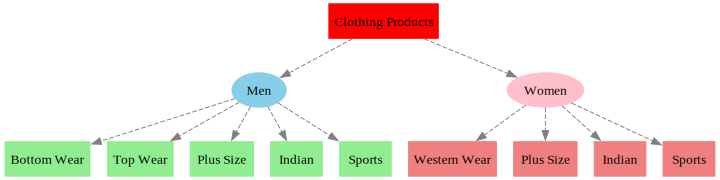

In [14]:
# Save and render the tree diagram
tree_diagram.render('D:/Mintra_rating_project/tree_diagram', cleanup=True, view=False)

# Display the tree diagram (optional)
tree_diagram